<h2 style = 'background-color:teal;padding:10px;color:white;border-radius:10px;text-align:center;margin-left:150px;margin-right:170px;'> Foreign exchange Forecast </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import datetime

In [3]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
plt.style.use('seaborn-darkgrid')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(15, 5),
    titlesize=20,
    titleweight='bold'
)
%config InlineBackend.figure_format = 'retina'

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:600px'> Loading, cleaning and undestanding exchange data </h3>

In [6]:
# loading exchange data
exchange_df = pd.read_excel('ExchangeRates.xlsx')

In [7]:
exchange_df

,Currency,Buying,Selling,Middle,Date
0,USD,150.0445,151.5525,150.7985,6/21/2011 12:00:00 AM
1,USD,150.0447,151.5527,150.7987,6/20/2011 12:00:00 AM
2,USD,150.0447,151.5527,150.7987,7/5/2011 12:00:00 AM
3,USD,150.0447,151.5527,150.7987,8/5/2011 12:00:00 AM
4,USD,150.0448,151.5528,150.7988,6/24/2011 12:00:00 AM
...,...,...,...,...,...
3133,USD,1666.7326,1700.0000,1683.3663,1/26/2024 12:00:00 AM
3134,USD,1666.7326,1700.0000,1683.3663,1/29/2024 12:00:00 AM
3135,USD,1666.7326,1700.0000,1683.3663,1/30/2024 12:00:00 AM
3136,USD,1666.7326,1700.0000,1683.3663,1/31/2024 12:00:00 AM


In [8]:
# basic info on exchange_df variables
exchange_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Currency  3138 non-null   object 
 1   Buying    3138 non-null   float64
 2   Selling   3138 non-null   float64
 3   Middle    3138 non-null   float64
 4   Date      3138 non-null   object 
dtypes: float64(3), object(2)
memory usage: 122.7+ KB


In [9]:
# converting date column to datetime format and making it the index
exchange_df.Date = pd.to_datetime(exchange_df.Date)
exchange_df.index = exchange_df.Date

In [10]:
# dropping date and currency columns from the dataframe
exchange_df.drop(['Date','Currency'],axis = 'columns',inplace = True)

In [11]:
# sorting values by the date index
exchange_df.sort_values(by = 'Date',inplace = True)

In [12]:
# values from 2012-1-1 will be used in our model
exchange_df = exchange_df.loc[exchange_df.index >= '2012-1-1']
exchange_df

,Buying,Selling,Middle
Date,,,
2012-01-03,162.2187,165.4959,163.8573
2012-01-04,163.1291,166.4247,164.7769
2012-01-05,162.2739,165.5521,163.9130
2012-01-06,161.9818,165.2542,163.6180
2012-01-09,161.9818,165.2542,163.6180
...,...,...,...
2024-01-26,1666.7326,1700.0000,1683.3663
2024-01-29,1666.7326,1700.0000,1683.3663
2024-01-30,1666.7326,1700.0000,1683.3663


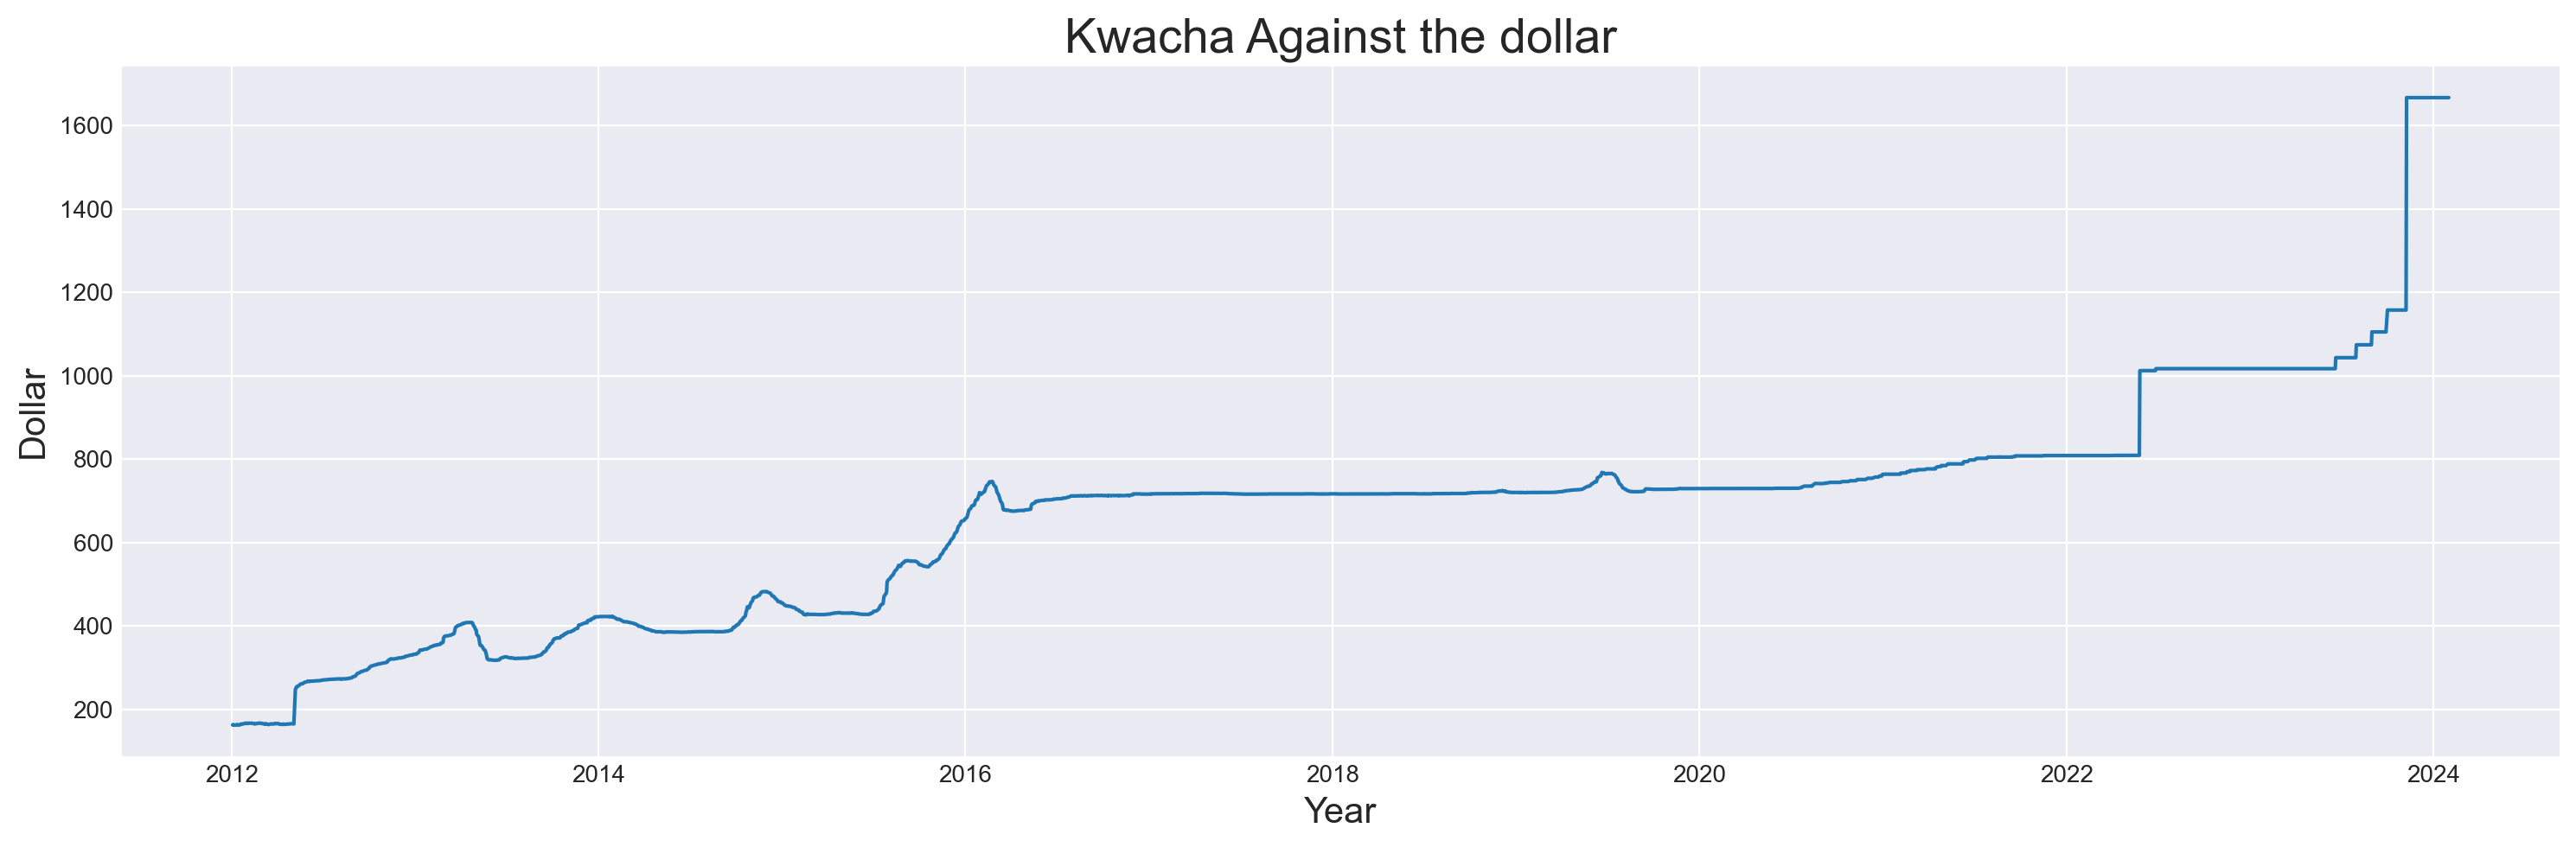

In [13]:
# plotting movement of usd dollar in kwacha at the rate the usd can be bought
plt.plot(exchange_df.Buying)
plt.title('Kwacha Against the dollar',size = 20)
plt.xlabel('Year',size = 15)
plt.ylabel('Dollar',size = 15)
plt.show()

In [14]:
# generating dates from 2012-1-1, to be used in dealing with missing values in the dataframe
dates = []
for i in range(4415):
    date = 734503 + i
    datetime_ = str(datetime.date.fromordinal(date))
    dates.append(datetime_)

In [15]:
dates

['2012-01-01',
 '2012-01-02',
 '2012-01-03',
 '2012-01-04',
 '2012-01-05',
 '2012-01-06',
 '2012-01-07',
 '2012-01-08',
 '2012-01-09',
 '2012-01-10',
 '2012-01-11',
 '2012-01-12',
 '2012-01-13',
 '2012-01-14',
 '2012-01-15',
 '2012-01-16',
 '2012-01-17',
 '2012-01-18',
 '2012-01-19',
 '2012-01-20',
 '2012-01-21',
 '2012-01-22',
 '2012-01-23',
 '2012-01-24',
 '2012-01-25',
 '2012-01-26',
 '2012-01-27',
 '2012-01-28',
 '2012-01-29',
 '2012-01-30',
 '2012-01-31',
 '2012-02-01',
 '2012-02-02',
 '2012-02-03',
 '2012-02-04',
 '2012-02-05',
 '2012-02-06',
 '2012-02-07',
 '2012-02-08',
 '2012-02-09',
 '2012-02-10',
 '2012-02-11',
 '2012-02-12',
 '2012-02-13',
 '2012-02-14',
 '2012-02-15',
 '2012-02-16',
 '2012-02-17',
 '2012-02-18',
 '2012-02-19',
 '2012-02-20',
 '2012-02-21',
 '2012-02-22',
 '2012-02-23',
 '2012-02-24',
 '2012-02-25',
 '2012-02-26',
 '2012-02-27',
 '2012-02-28',
 '2012-02-29',
 '2012-03-01',
 '2012-03-02',
 '2012-03-03',
 '2012-03-04',
 '2012-03-05',
 '2012-03-06',
 '2012-03-

In [16]:
# making dates object an index in a newly created dataframe
df = pd.DataFrame({'Count':list(range(4415))},index = dates)

In [17]:
df.head()

,Count
2012-01-01,0
2012-01-02,1
2012-01-03,2
2012-01-04,3
2012-01-05,4


In [18]:
df.tail()

,Count
2024-01-28,4410
2024-01-29,4411
2024-01-30,4412
2024-01-31,4413
2024-02-01,4414


In [19]:
# converting df index to datetime format
df.index = pd.to_datetime(df.index)

In [20]:
# concatenation of exchange_df and df to produce a dataframe that has no missing date values. It ends up producing null values in the newly created dates
exchange_df = df.join(exchange_df)
exchange_df

,Count,Buying,Selling,Middle
2012-01-01,0,NaN,NaN,NaN
2012-01-02,1,NaN,NaN,NaN
2012-01-03,2,162.2187,165.4959,163.8573
2012-01-04,3,163.1291,166.4247,164.7769
2012-01-05,4,162.2739,165.5521,163.9130
...,...,...,...,...
2024-01-28,4410,NaN,NaN,NaN
2024-01-29,4411,1666.7326,1700.0000,1683.3663
2024-01-30,4412,1666.7326,1700.0000,1683.3663
2024-01-31,4413,1666.7326,1700.0000,1683.3663


In [21]:
# dropping count,selling,Middle columns from the dataframe
exchange_df.drop(['Count','Selling','Middle'],axis = 'columns',inplace = True)

In [22]:
# missing values out of 4383
len(exchange_df.index) - len(exchange_df.dropna().index) 

1409

In [23]:
exchange_df

,Buying
2012-01-01,NaN
2012-01-02,NaN
2012-01-03,162.2187
2012-01-04,163.1291
2012-01-05,162.2739
...,...
2024-01-28,NaN
2024-01-29,1666.7326
2024-01-30,1666.7326
2024-01-31,1666.7326


In [24]:
# null values
null_ex = exchange_df.loc[exchange_df['Buying'].isnull()]
null_ex

,Buying
2012-01-01,NaN
2012-01-02,NaN
2012-01-07,NaN
2012-01-08,NaN
2012-01-10,NaN
...,...
2024-01-15,NaN
2024-01-20,NaN
2024-01-21,NaN
2024-01-27,NaN


In [25]:
# 2012 missing values
null_ex.loc[(null_ex.index >= '2012') & (null_ex.index < '2013')]

,Buying
2012-01-01,NaN
2012-01-02,NaN
2012-01-07,NaN
2012-01-08,NaN
2012-01-10,NaN
...,...
2012-12-23,NaN
2012-12-25,NaN
2012-12-26,NaN
2012-12-29,NaN


In [26]:
# 2013 missing values
null_ex.loc[(null_ex.index >= '2013') & (null_ex.index < '2014')]

,Buying
2013-01-01,NaN
2013-01-05,NaN
2013-01-06,NaN
2013-01-12,NaN
2013-01-13,NaN
...,...
2013-12-22,NaN
2013-12-25,NaN
2013-12-26,NaN
2013-12-28,NaN


In [27]:
# 2014 missing values
null_ex.loc[(null_ex.index >= '2014') & (null_ex.index < '2015')]

,Buying
2014-01-01,NaN
2014-01-04,NaN
2014-01-05,NaN
2014-01-11,NaN
2014-01-12,NaN
...,...
2014-12-21,NaN
2014-12-25,NaN
2014-12-26,NaN
2014-12-27,NaN


In [28]:
# 2015 missing values
null_ex.loc[(null_ex.index >= '2015') & (null_ex.index < '2016')]

,Buying
2015-01-01,NaN
2015-01-03,NaN
2015-01-04,NaN
2015-01-10,NaN
2015-01-11,NaN
...,...
2015-12-20,NaN
2015-12-25,NaN
2015-12-26,NaN
2015-12-27,NaN


In [29]:
# 2016 missing values
null_ex.loc[(null_ex.index >= '2016') & (null_ex.index < '2017')]

,Buying
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-09,NaN
2016-01-10,NaN
...,...
2016-12-24,NaN
2016-12-25,NaN
2016-12-26,NaN
2016-12-27,NaN


In [30]:
# 2017 missing values
null_ex.loc[(null_ex.index >= '2017') & (null_ex.index < '2018')]

,Buying
2017-01-01,NaN
2017-01-02,NaN
2017-01-07,NaN
2017-01-08,NaN
2017-01-14,NaN
...,...
2017-12-24,NaN
2017-12-25,NaN
2017-12-26,NaN
2017-12-30,NaN


In [31]:
# 2018 missing values
null_ex.loc[(null_ex.index >= '2018') & (null_ex.index < '2019')]

,Buying
2018-01-01,NaN
2018-01-06,NaN
2018-01-07,NaN
2018-01-13,NaN
2018-01-14,NaN
...,...
2018-12-23,NaN
2018-12-25,NaN
2018-12-26,NaN
2018-12-29,NaN


In [32]:
# 2019 missing values
null_ex.loc[(null_ex.index >= '2019') & (null_ex.index < '2020')]

,Buying
2019-01-01,NaN
2019-01-05,NaN
2019-01-06,NaN
2019-01-12,NaN
2019-01-13,NaN
...,...
2019-12-22,NaN
2019-12-25,NaN
2019-12-26,NaN
2019-12-28,NaN


In [33]:
# 2020 missing values
null_ex.loc[(null_ex.index >= '2020') & (null_ex.index < '2021')]

,Buying
2020-01-01,NaN
2020-01-04,NaN
2020-01-05,NaN
2020-01-11,NaN
2020-01-12,NaN
...,...
2020-12-20,NaN
2020-12-25,NaN
2020-12-26,NaN
2020-12-27,NaN


In [34]:
# 2021 missing values
null_ex.loc[(null_ex.index >= '2021') & (null_ex.index < '2022')]

,Buying
2021-01-01,NaN
2021-01-02,NaN
2021-01-03,NaN
2021-01-09,NaN
2021-01-10,NaN
...,...
2021-12-19,NaN
2021-12-25,NaN
2021-12-26,NaN
2021-12-27,NaN


In [35]:
# 2022 missing values
null_ex.loc[(null_ex.index >= '2022') & (null_ex.index < '2023')]

,Buying
2022-01-01,NaN
2022-01-02,NaN
2022-01-03,NaN
2022-01-08,NaN
2022-01-09,NaN
...,...
2022-12-24,NaN
2022-12-25,NaN
2022-12-26,NaN
2022-12-27,NaN


In [36]:
# 2023 missing values
null_ex.loc[(null_ex.index >= '2023') & (null_ex.index < '2024')]

,Buying
2023-01-01,NaN
2023-01-02,NaN
2023-01-07,NaN
2023-01-08,NaN
2023-01-14,NaN
...,...
2023-12-24,NaN
2023-12-25,NaN
2023-12-26,NaN
2023-12-30,NaN


In [37]:
# 2024 missing values
null_ex.loc[(null_ex.index == '2024')]

,Buying
2024-01-01,NaN


In [38]:
# introducing week column. It assigns the week of the year for a particular date
exchange_df['Week'] = exchange_df.index.week

In [39]:
exchange_df

,Buying,Week
2012-01-01,NaN,52
2012-01-02,NaN,1
2012-01-03,162.2187,1
2012-01-04,163.1291,1
2012-01-05,162.2739,1
...,...,...
2024-01-28,NaN,4
2024-01-29,1666.7326,5
2024-01-30,1666.7326,5
2024-01-31,1666.7326,5


In [40]:
# Introducing year column. It assigns year for a particular date
exchange_df['Year'] = exchange_df.index.year

In [41]:
exchange_df

,Buying,Week,Year
2012-01-01,NaN,52,2012
2012-01-02,NaN,1,2012
2012-01-03,162.2187,1,2012
2012-01-04,163.1291,1,2012
2012-01-05,162.2739,1,2012
...,...,...,...
2024-01-28,NaN,4,2024
2024-01-29,1666.7326,5,2024
2024-01-30,1666.7326,5,2024
2024-01-31,1666.7326,5,2024


In [42]:
exchange_df.Year.unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024], dtype=int64)

In [43]:
exchange_df.Week.unique()

array([52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 53], dtype=int64)

In [44]:
exchange_df.loc[exchange_df['Week'] == 53]

,Buying,Week,Year
2015-12-28,NaN,53,2015
2015-12-29,652.4092,53,2015
2015-12-30,653.7415,53,2015
2015-12-31,656.0604,53,2015
2016-01-01,NaN,53,2016
2016-01-02,NaN,53,2016
2016-01-03,NaN,53,2016
2020-12-28,NaN,53,2020
2020-12-29,759.2778,53,2020
2020-12-30,762.3538,53,2020


In [45]:
# since week 53 is close to week 52, it will considered week 52 for constistency since some years do not have week 53 and also some week 53s contain null values which can make null values handling through use of mean impossible to implement
exchange_df.loc[exchange_df['Week'] == 53,'Week'] = 52

In [46]:
exchange_df.loc[exchange_df['Week'] == 53]

,Buying,Week,Year


In [47]:
# 2012 values start with week 52. The 52 stems from last week of 2011 which happens to contain the first day of 2012
# the last day is in the first week of 2013
exchange_df.loc[exchange_df['Year'] == 2012]

,Buying,Week,Year
2012-01-01,NaN,52,2012
2012-01-02,NaN,1,2012
2012-01-03,162.2187,1,2012
2012-01-04,163.1291,1,2012
2012-01-05,162.2739,1,2012
...,...,...,...
2012-12-27,330.2359,52,2012
2012-12-28,331.5026,52,2012
2012-12-29,NaN,52,2012
2012-12-30,NaN,52,2012


In [48]:
# if maintained, the 52 will cause conflict with week 52 values of 2012. Therefore, will be treated as week 1
exchange_df.loc[exchange_df.index == '2012-01-01','Week'] = 1

In [49]:
# last day of 2012 will be treated as a day in week 52 of that year
exchange_df.loc[exchange_df.index == '2012-12-31','Week'] = 52

In [50]:
# 2012 values after modification
exchange_df.loc[exchange_df['Year'] == 2012]

,Buying,Week,Year
2012-01-01,NaN,1,2012
2012-01-02,NaN,1,2012
2012-01-03,162.2187,1,2012
2012-01-04,163.1291,1,2012
2012-01-05,162.2739,1,2012
...,...,...,...
2012-12-27,330.2359,52,2012
2012-12-28,331.5026,52,2012
2012-12-29,NaN,52,2012
2012-12-30,NaN,52,2012


In [51]:
# 2013 values
exchange_df.loc[exchange_df['Year'] == 2013]

,Buying,Week,Year
2013-01-01,NaN,1,2013
2013-01-02,332.0450,1,2013
2013-01-03,332.1915,1,2013
2013-01-04,333.7009,1,2013
2013-01-05,NaN,1,2013
...,...,...,...
2013-12-27,421.3864,52,2013
2013-12-28,NaN,52,2013
2013-12-29,NaN,52,2013
2013-12-30,421.5197,1,2013


In [52]:
# the last 2 days of 2013 will be treated as days of week 52 of that year
exchange_df.loc[(exchange_df.index >= '2013-12-30') & (exchange_df.index <= '2013-12-31'),'Week'] = 52

In [53]:
# 2013 values after modification
exchange_df.loc[exchange_df['Year'] == 2013]

,Buying,Week,Year
2013-01-01,NaN,1,2013
2013-01-02,332.0450,1,2013
2013-01-03,332.1915,1,2013
2013-01-04,333.7009,1,2013
2013-01-05,NaN,1,2013
...,...,...,...
2013-12-27,421.3864,52,2013
2013-12-28,NaN,52,2013
2013-12-29,NaN,52,2013
2013-12-30,421.5197,52,2013


In [54]:
# 2014 values
exchange_df.loc[exchange_df['Year'] == 2014]

,Buying,Week,Year
2014-01-01,NaN,1,2014
2014-01-02,421.8279,1,2014
2014-01-03,422.1010,1,2014
2014-01-04,NaN,1,2014
2014-01-05,NaN,1,2014
...,...,...,...
2014-12-27,NaN,52,2014
2014-12-28,NaN,52,2014
2014-12-29,457.3163,1,2014
2014-12-30,455.4707,1,2014


In [55]:
# last 3 days of 2014 will be treated as days for week 52 of that year
exchange_df.loc[(exchange_df.index >= '2014-12-29') & (exchange_df.index <= '2014-12-31'),'Week'] = 52

In [56]:
# 2014 values after modification
exchange_df.loc[exchange_df['Year'] == 2014]

,Buying,Week,Year
2014-01-01,NaN,1,2014
2014-01-02,421.8279,1,2014
2014-01-03,422.1010,1,2014
2014-01-04,NaN,1,2014
2014-01-05,NaN,1,2014
...,...,...,...
2014-12-27,NaN,52,2014
2014-12-28,NaN,52,2014
2014-12-29,457.3163,52,2014
2014-12-30,455.4707,52,2014


In [57]:
# 2015 values, need no modification
exchange_df.loc[exchange_df['Year'] == 2015]

,Buying,Week,Year
2015-01-01,NaN,1,2015
2015-01-02,454.3796,1,2015
2015-01-03,NaN,1,2015
2015-01-04,NaN,1,2015
2015-01-05,450.6979,2,2015
...,...,...,...
2015-12-27,NaN,52,2015
2015-12-28,NaN,52,2015
2015-12-29,652.4092,52,2015
2015-12-30,653.7415,52,2015


In [58]:
# 2016 values
exchange_df.loc[exchange_df['Year'] == 2016]

,Buying,Week,Year
2016-01-01,NaN,52,2016
2016-01-02,NaN,52,2016
2016-01-03,NaN,52,2016
2016-01-04,660.1833,1,2016
2016-01-05,664.6160,1,2016
...,...,...,...
2016-12-27,NaN,52,2016
2016-12-28,715.7742,52,2016
2016-12-29,715.7732,52,2016
2016-12-30,715.8017,52,2016


In [59]:
# the first 3 days of 2016 will be treated as days of week 1 of that year
exchange_df.loc[(exchange_df.index >= '2016-01-01') & (exchange_df.index <= '2016-01-3'),'Week'] = 1

In [60]:
# 2016 values after modification
exchange_df.loc[exchange_df['Year'] == 2016,'Week']

2016-01-01     1
2016-01-02     1
2016-01-03     1
2016-01-04     1
2016-01-05     1
              ..
2016-12-27    52
2016-12-28    52
2016-12-29    52
2016-12-30    52
2016-12-31    52
Name: Week, Length: 366, dtype: int64

In [61]:
# 2017 values
exchange_df.loc[exchange_df['Year'] == 2017]

,Buying,Week,Year
2017-01-01,NaN,52,2017
2017-01-02,NaN,1,2017
2017-01-03,716.0883,1,2017
2017-01-04,715.4995,1,2017
2017-01-05,716.2103,1,2017
...,...,...,...
2017-12-27,716.5102,52,2017
2017-12-28,716.5128,52,2017
2017-12-29,716.5142,52,2017
2017-12-30,NaN,52,2017


In [62]:
# first day of 2017 will be treated as a day for week 1 for that year
exchange_df.loc[exchange_df.index == '2017-01-01','Week'] = 1

In [63]:
# 2017 values after modification
exchange_df.loc[exchange_df['Year'] == 2017]

,Buying,Week,Year
2017-01-01,NaN,1,2017
2017-01-02,NaN,1,2017
2017-01-03,716.0883,1,2017
2017-01-04,715.4995,1,2017
2017-01-05,716.2103,1,2017
...,...,...,...
2017-12-27,716.5102,52,2017
2017-12-28,716.5128,52,2017
2017-12-29,716.5142,52,2017
2017-12-30,NaN,52,2017


In [64]:
# 2018 values
exchange_df.loc[exchange_df['Year'] == 2018]

,Buying,Week,Year
2018-01-01,NaN,1,2018
2018-01-02,716.5143,1,2018
2018-01-03,716.5416,1,2018
2018-01-04,716.5413,1,2018
2018-01-05,716.5385,1,2018
...,...,...,...
2018-12-27,719.7693,52,2018
2018-12-28,719.7693,52,2018
2018-12-29,NaN,52,2018
2018-12-30,NaN,52,2018


In [65]:
# last day treated as a day for week 52 for that year
exchange_df.loc[exchange_df.index == '2018-12-31','Week'] = 52

In [66]:
# 2018 values after modification
exchange_df.loc[exchange_df['Year'] == 2018]

,Buying,Week,Year
2018-01-01,NaN,1,2018
2018-01-02,716.5143,1,2018
2018-01-03,716.5416,1,2018
2018-01-04,716.5413,1,2018
2018-01-05,716.5385,1,2018
...,...,...,...
2018-12-27,719.7693,52,2018
2018-12-28,719.7693,52,2018
2018-12-29,NaN,52,2018
2018-12-30,NaN,52,2018


In [67]:
# 2019 values
exchange_df.loc[exchange_df['Year'] == 2019]

,Buying,Week,Year
2019-01-01,NaN,1,2019
2019-01-02,719.7693,1,2019
2019-01-03,719.7693,1,2019
2019-01-04,719.7693,1,2019
2019-01-05,NaN,1,2019
...,...,...,...
2019-12-27,729.1112,52,2019
2019-12-28,NaN,52,2019
2019-12-29,NaN,52,2019
2019-12-30,729.1112,1,2019


In [68]:
# last 2 days treated as days for week 52 of that year
exchange_df.loc[(exchange_df.index >= '2019-12-30') & (exchange_df.index <= '2019-12-31'),'Week'] = 52

In [69]:
# 2019 values after modification
exchange_df.loc[exchange_df['Year'] == 2019]

,Buying,Week,Year
2019-01-01,NaN,1,2019
2019-01-02,719.7693,1,2019
2019-01-03,719.7693,1,2019
2019-01-04,719.7693,1,2019
2019-01-05,NaN,1,2019
...,...,...,...
2019-12-27,729.1112,52,2019
2019-12-28,NaN,52,2019
2019-12-29,NaN,52,2019
2019-12-30,729.1112,52,2019


In [70]:
# 2020 values
exchange_df.loc[exchange_df['Year'] == 2020]

,Buying,Week,Year
2020-01-01,NaN,1,2020
2020-01-02,729.1112,1,2020
2020-01-03,729.1112,1,2020
2020-01-04,NaN,1,2020
2020-01-05,NaN,1,2020
...,...,...,...
2020-12-27,NaN,52,2020
2020-12-28,NaN,52,2020
2020-12-29,759.2778,52,2020
2020-12-30,762.3538,52,2020


In [71]:
# 2021 values
exchange_df.loc[exchange_df['Year'] == 2021]

,Buying,Week,Year
2021-01-01,NaN,52,2021
2021-01-02,NaN,52,2021
2021-01-03,NaN,52,2021
2021-01-04,763.5686,1,2021
2021-01-05,763.5686,1,2021
...,...,...,...
2021-12-27,NaN,52,2021
2021-12-28,NaN,52,2021
2021-12-29,808.3178,52,2021
2021-12-30,808.3178,52,2021


In [72]:
# first 3 days treated as days for week 1 of that year
exchange_df.loc[(exchange_df.index >= '2021-01-1') & (exchange_df.index <= '2021-01-03'),'Week'] = 1

In [73]:
# 2021 values after modification
exchange_df.loc[exchange_df['Year'] == 2021]

,Buying,Week,Year
2021-01-01,NaN,1,2021
2021-01-02,NaN,1,2021
2021-01-03,NaN,1,2021
2021-01-04,763.5686,1,2021
2021-01-05,763.5686,1,2021
...,...,...,...
2021-12-27,NaN,52,2021
2021-12-28,NaN,52,2021
2021-12-29,808.3178,52,2021
2021-12-30,808.3178,52,2021


In [74]:
# 2022 values
exchange_df.loc[exchange_df['Year'] == 2022]

,Buying,Week,Year
2022-01-01,NaN,52,2022
2022-01-02,NaN,52,2022
2022-01-03,NaN,1,2022
2022-01-04,808.3178,1,2022
2022-01-05,808.3178,1,2022
...,...,...,...
2022-12-27,NaN,52,2022
2022-12-28,1016.6211,52,2022
2022-12-29,1016.6211,52,2022
2022-12-30,1016.6211,52,2022


In [75]:
# the first two days treated as days for week 1 of that year
exchange_df.loc[(exchange_df.index >= '2022-01-1') & (exchange_df.index <= '2022-01-02'),'Week'] = 1

In [76]:
# 2022 values after modification
exchange_df.loc[exchange_df['Year'] == 2022]

,Buying,Week,Year
2022-01-01,NaN,1,2022
2022-01-02,NaN,1,2022
2022-01-03,NaN,1,2022
2022-01-04,808.3178,1,2022
2022-01-05,808.3178,1,2022
...,...,...,...
2022-12-27,NaN,52,2022
2022-12-28,1016.6211,52,2022
2022-12-29,1016.6211,52,2022
2022-12-30,1016.6211,52,2022


In [77]:
# 2023 values
exchange_df.loc[exchange_df['Year'] == 2023]

,Buying,Week,Year
2023-01-01,NaN,52,2023
2023-01-02,NaN,1,2023
2023-01-03,1016.6211,1,2023
2023-01-04,1016.6211,1,2023
2023-01-05,1016.6211,1,2023
...,...,...,...
2023-12-27,1666.7326,52,2023
2023-12-28,1666.7326,52,2023
2023-12-29,1666.7326,52,2023
2023-12-30,NaN,52,2023


In [78]:
# first day treated as a day for week 1 of that year
exchange_df.loc[exchange_df.index == '2023-01-1','Week'] = 1

In [79]:
# 2023 values after modification
exchange_df.loc[exchange_df['Year'] == 2023]

,Buying,Week,Year
2023-01-01,NaN,1,2023
2023-01-02,NaN,1,2023
2023-01-03,1016.6211,1,2023
2023-01-04,1016.6211,1,2023
2023-01-05,1016.6211,1,2023
...,...,...,...
2023-12-27,1666.7326,52,2023
2023-12-28,1666.7326,52,2023
2023-12-29,1666.7326,52,2023
2023-12-30,NaN,52,2023


In [80]:
# 2024 values
exchange_df.loc[exchange_df['Year'] == 2024]

,Buying,Week,Year
2024-01-01,NaN,1,2024
2024-01-02,1666.7326,1,2024
2024-01-03,1666.7326,1,2024
2024-01-04,1666.7326,1,2024
2024-01-05,1666.7326,1,2024
2024-01-06,NaN,1,2024
2024-01-07,NaN,1,2024
2024-01-08,1666.7326,2,2024
2024-01-09,1666.7326,2,2024
2024-01-10,1666.7326,2,2024


In [81]:
# calculating weekly average value of a dollar to fill the null values
weekly_mean_rates = pd.DataFrame(exchange_df.groupby(['Year','Week'])['Buying'].mean())
weekly_mean_rates

Buying
Year Week             
2012 1      162.400875
     2      162.346675
     3      163.165875
     4      165.074280
     5      166.052540
...                ...
2024 1     1666.732600
     2     1666.732600
     3     1666.732600
     4     1666.732600
     5     1666.732600

[629 rows x 1 columns]

In [82]:
# reindexing the dataframe
weekly_mean_rates_reindex = weekly_mean_rates.reset_index()
weekly_mean_rates_reindex

,Year,Week,Buying
0,2012,1,162.400875
1,2012,2,162.346675
2,2012,3,163.165875
3,2012,4,165.074280
4,2012,5,166.052540
...,...,...,...
624,2024,1,1666.732600
625,2024,2,1666.732600
626,2024,3,1666.732600
627,2024,4,1666.732600


In [83]:
# function that returns weekly average value of a dollar taking in week for a particular year as input
def use_mean(i,u):
    return weekly_mean_rates_reindex.loc[(weekly_mean_rates_reindex['Year'] == i) & (weekly_mean_rates_reindex['Week'] == u),'Buying'].values[0]

In [84]:
# filling the missing values using the function
for i in exchange_df.Year.unique():
    for x in exchange_df.loc[exchange_df['Year'] == i].Week.unique():
        exchange_df.loc[(exchange_df['Year'] == i) & (exchange_df['Week'] == x) & (exchange_df.Buying.isnull()),'Buying'] = use_mean(i,x)

In [85]:
exchange_df

,Buying,Week,Year
2012-01-01,162.400875,1,2012
2012-01-02,162.400875,1,2012
2012-01-03,162.218700,1,2012
2012-01-04,163.129100,1,2012
2012-01-05,162.273900,1,2012
...,...,...,...
2024-01-28,1666.732600,4,2024
2024-01-29,1666.732600,5,2024
2024-01-30,1666.732600,5,2024
2024-01-31,1666.732600,5,2024


In [86]:
# naming the index
exchange_df.index.names = ['Date']

In [87]:
exchange_df.sort_values(by = 'Date',inplace = True)

In [88]:
# dropping year and week columns after their intended purpose
exchange_df.drop(['Year','Week'],axis = 'columns',inplace = True)

In [89]:
exchange_df.head()

,Buying
Date,
2012-01-01,162.400875
2012-01-02,162.400875
2012-01-03,162.218700
2012-01-04,163.129100
2012-01-05,162.273900


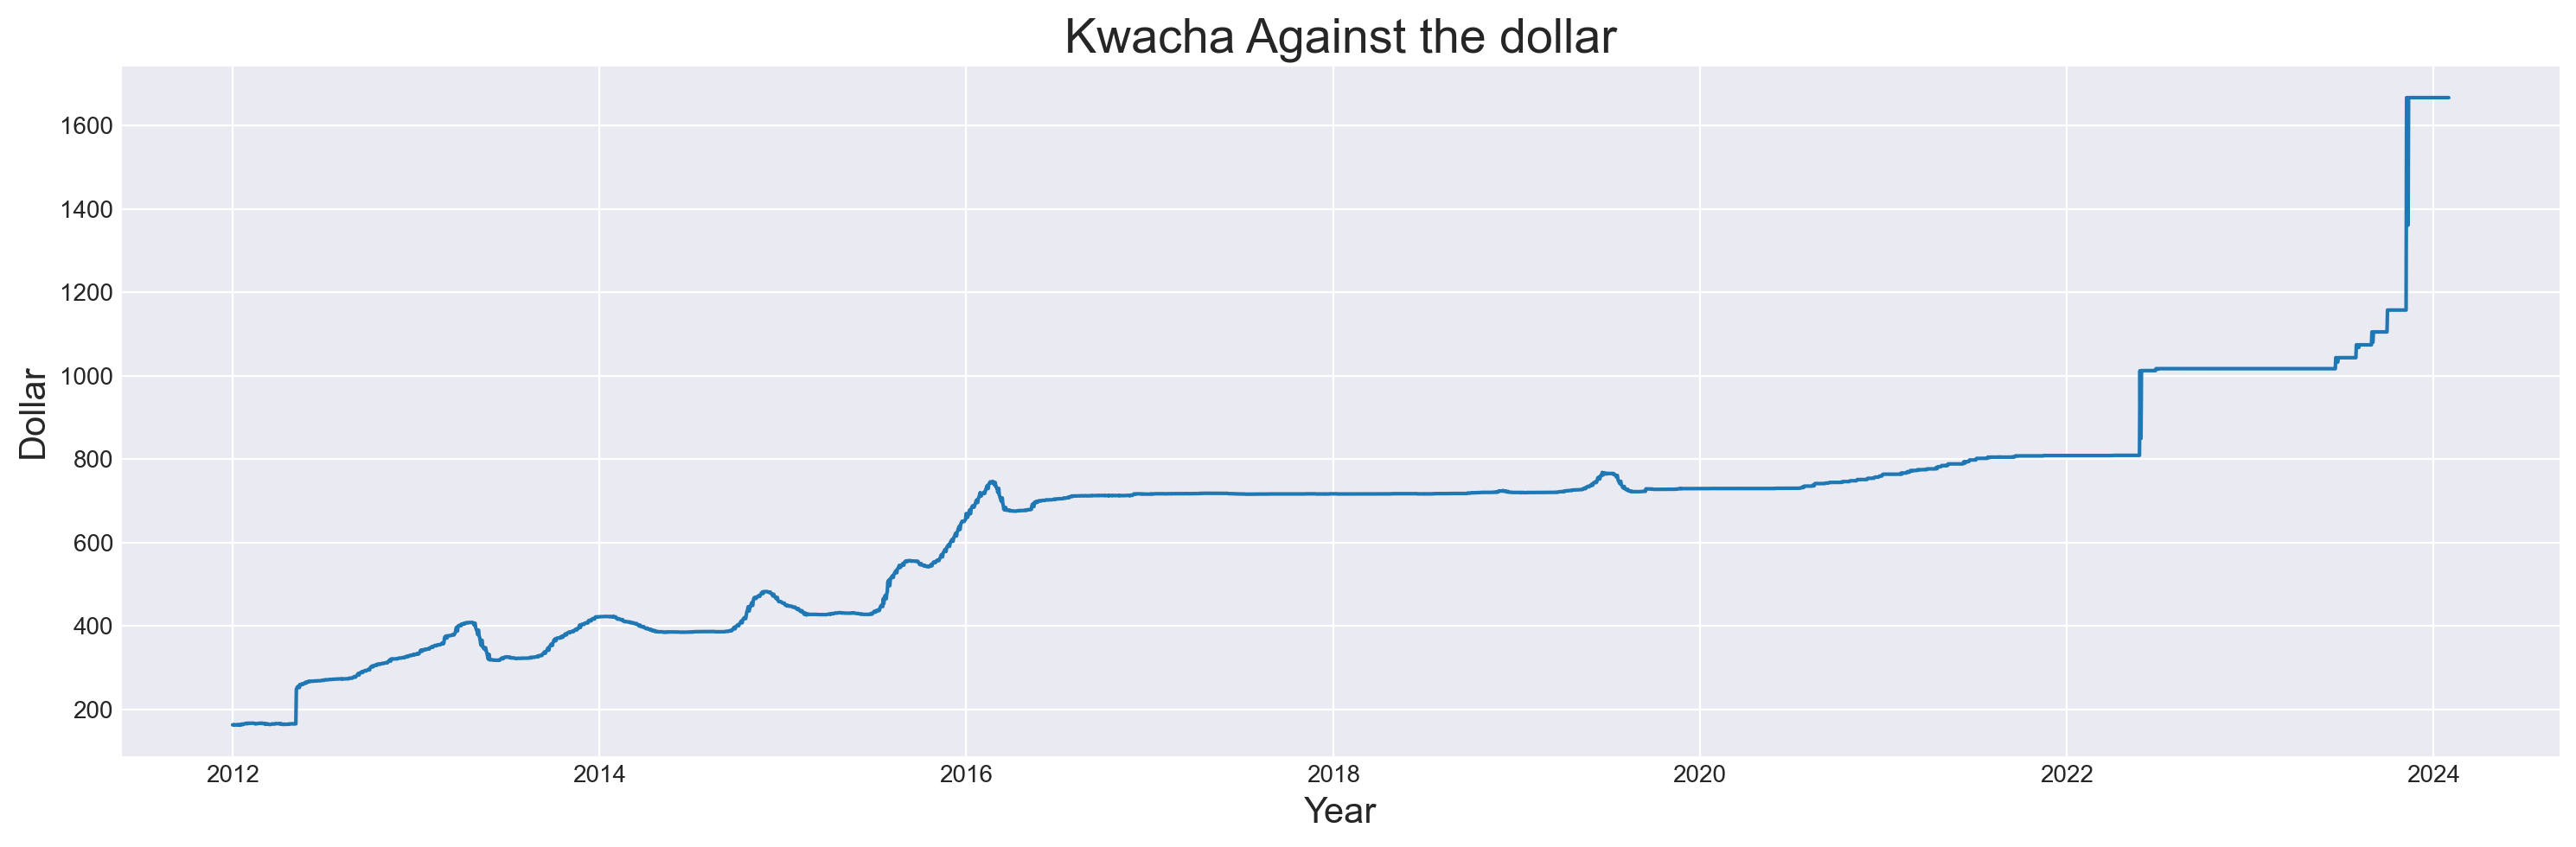

In [90]:
# ploting movememt of dollar against the kwacha
plt.plot(exchange_df.Buying)
plt.title('Kwacha Against the dollar',size = 20)
plt.xlabel('Year',size = 15)
plt.ylabel('Dollar',size = 15)
plt.show()

In [91]:
exchange_df.to_csv('exchangesti.csv')

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [93]:
# decomposing the ts
decomposition = seasonal_decompose(exchange_df.Buying)

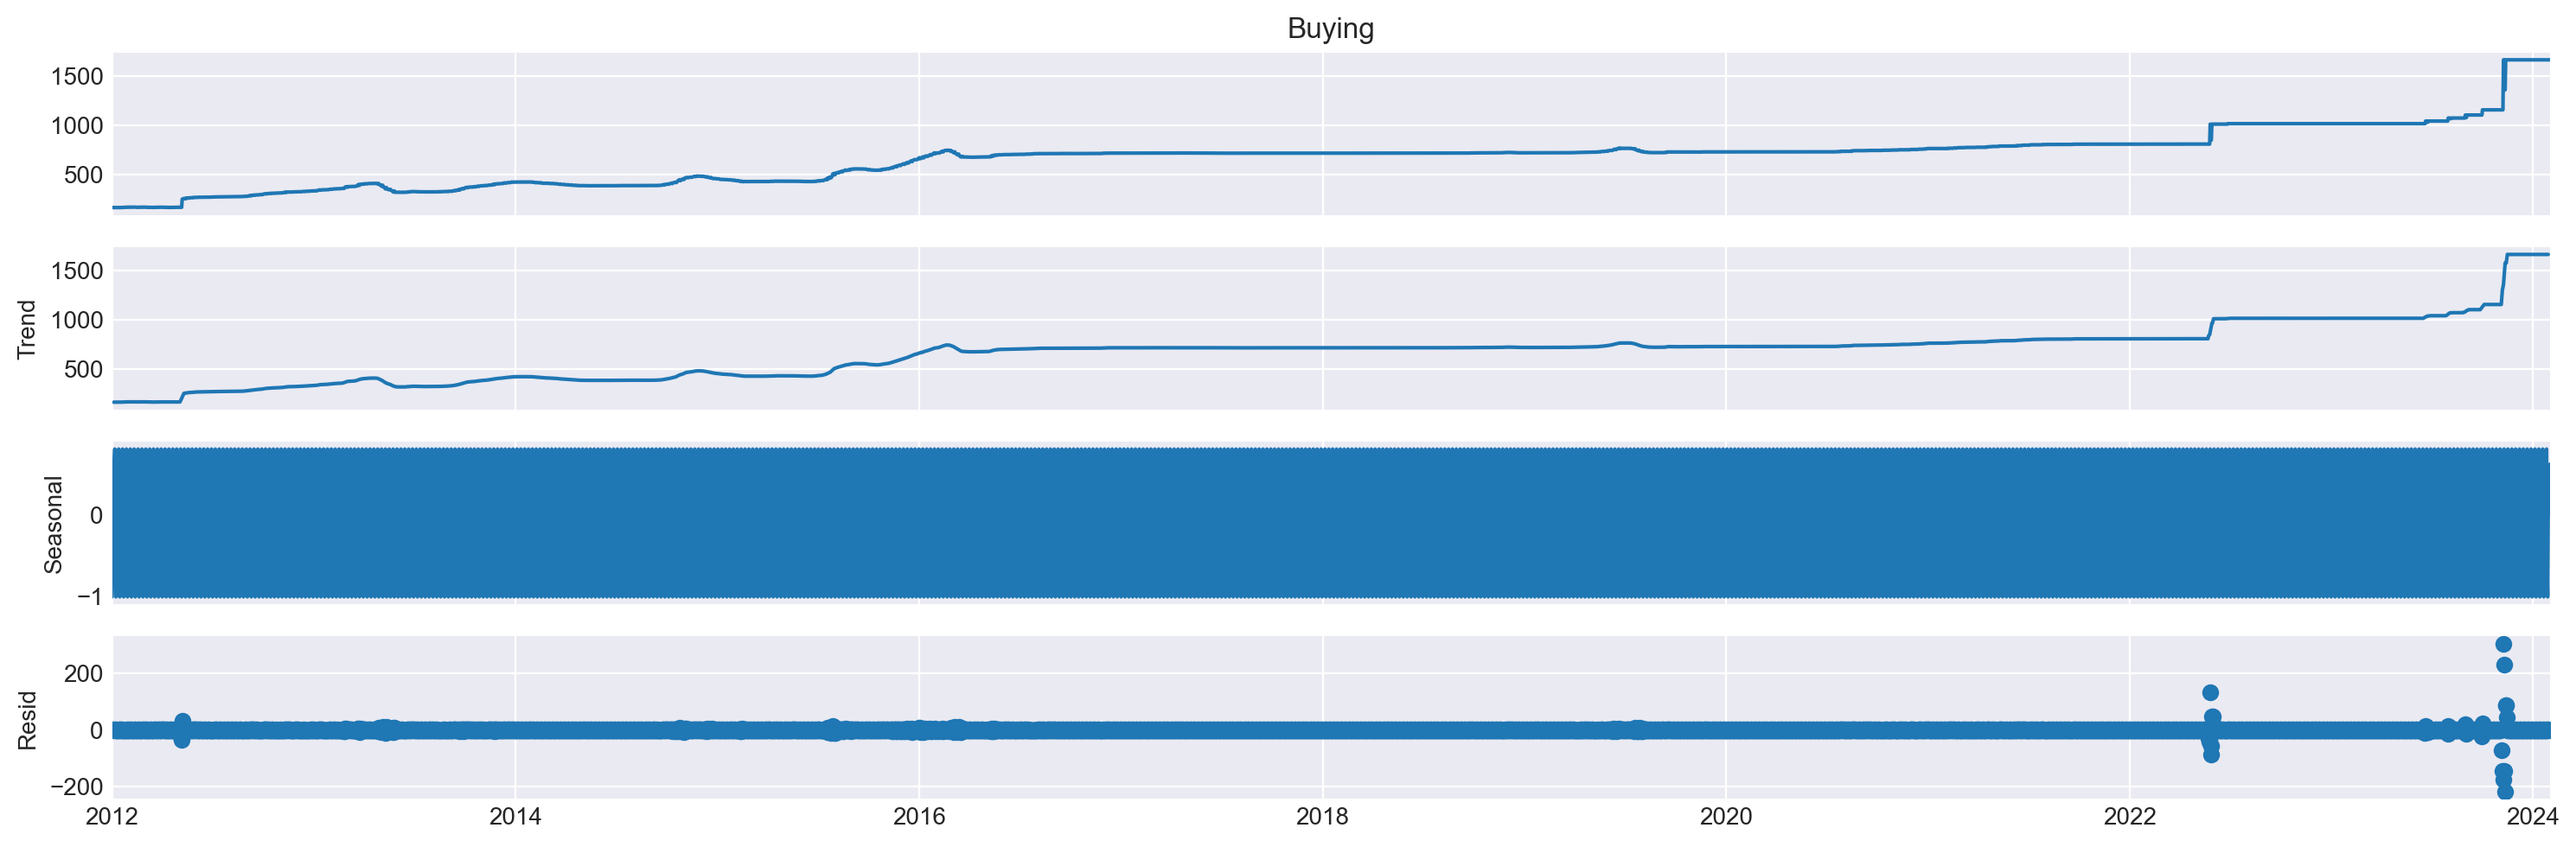

In [94]:
decomposition.plot()
plt.show()

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Checking stationarity (A) </h3>

#### Null hypothesis : Time series is not stationary
#### Alt hypothesis  : Time series is stationary

In [95]:
result = adfuller(exchange_df.Buying) # applying augmented dicky fuller test

In [96]:
test_statistic,p_value,critical_values = result[0],result[1],result[4]

In [97]:
test_statistic

1.1283643638009768

In [98]:
p_value

0.9954515769133917

In [99]:
critical_values

{'1%': -3.43183842642897, '5%': -2.862197703644282, '10%': -2.5671200998612353}

In [100]:
p_value < 0.05 # p-value is greater than significance value. Therefore we fail to reject the null hypothesis

False

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Making TS stationary </h3>

In [101]:
# log transformation
np.log(exchange_df.Buying)

Date
2012-01-01    5.090068
2012-01-02    5.090068
2012-01-03    5.088945
2012-01-04    5.094542
2012-01-05    5.089286
                ...   
2024-01-28    7.418620
2024-01-29    7.418620
2024-01-30    7.418620
2024-01-31    7.418620
2024-02-01    7.418620
Name: Buying, Length: 4415, dtype: float64

In [102]:
# making data stationary through log transformation and differencing

exchange_df['Diff'] = np.log(exchange_df.Buying).diff()

In [103]:
exchange_df

,Buying,Diff
Date,,
2012-01-01,162.400875,NaN
2012-01-02,162.400875,0.000000
2012-01-03,162.218700,-0.001122
2012-01-04,163.129100,0.005596
2012-01-05,162.273900,-0.005256
...,...,...
2024-01-28,1666.732600,0.000000
2024-01-29,1666.732600,0.000000
2024-01-30,1666.732600,0.000000


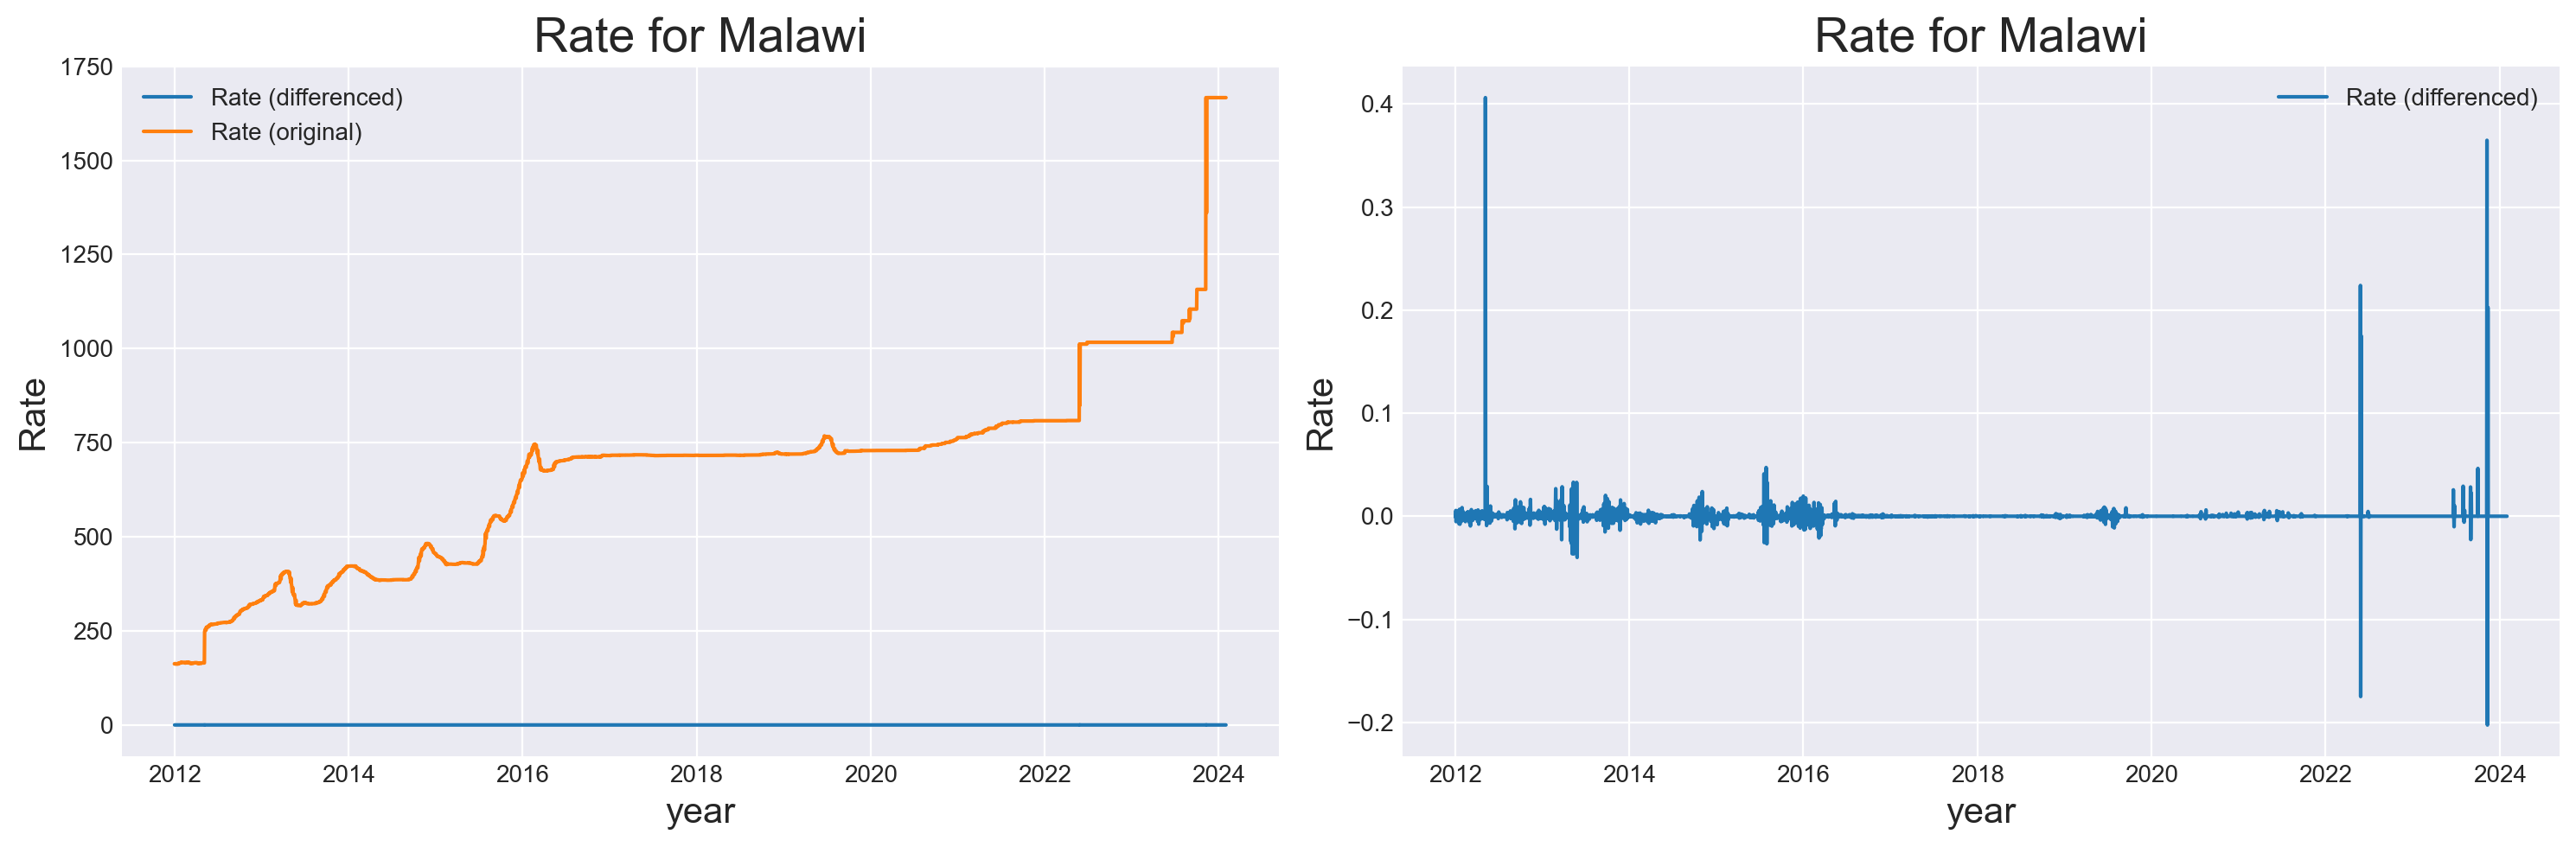

In [104]:
a,(ax,ax2) = plt.subplots(1,2)
ax.plot(exchange_df.Diff,label = 'Rate (differenced)')
ax.plot(exchange_df.Buying,label ='Rate (original)')
ax.set_title('Rate for Malawi',size = 20)
ax.set_xlabel('year',size = 15)
ax.set_ylabel('Rate',size =15)
ax.legend()
ax2.plot(exchange_df.Diff,label = 'Rate (differenced)')
ax2.set_title('Rate for Malawi',size = 20)
ax2.set_xlabel('year',size = 15)
ax2.set_ylabel('Rate',size =15)
ax2.legend()
plt.show()

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Checking stationarity (B) </h3>

#### Null hypothesis : Time series is not stationary
#### Alt hypothesis  : Time series is stationary

In [105]:
result2 = adfuller(exchange_df.Diff.dropna()) # applying augmented dicky fuller test after differencing and log transformation

In [106]:
test_statistic2,p_value2,critical_values2 = result2[0],result2[1],result2[4]

In [107]:
test_statistic2

-15.626866403067975

In [108]:
p_value2

1.7045211440141782e-28

In [109]:
critical_values2

{'1%': -3.431837072523396,
 '5%': -2.862197105532025,
 '10%': -2.5671197814566113}

In [110]:
p_value2 < 0.05 # p-value is less than significance value. Therefore, we reject null hypothesis.

True

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Estimating the model </h3>

#### Instead of box jenkins approach ;and plotting acf and pacf, auto arima has been used to arrive at the order of the ARIMA model.

In [111]:
from pmdarima import auto_arima

In [112]:
model = auto_arima(exchange_df['Diff'].dropna())

In [113]:
model

ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [114]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4414
Model:               SARIMAX(3, 0, 2)   Log Likelihood               13816.718
Date:                Wed, 08 May 2024   AIC                         -27621.436
Time:                        09:39:20   BIC                         -27583.081
Sample:                    01-02-2012   HQIC                        -27607.908
                         - 02-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8630      0.020     43.268      0.000       0.824       0.902
ar.L2         -0.3211      0.014    -22.724      0.000      -0.349      -0.293
ar.L3          0.3003      0.006     54.208      0.0

In [115]:
# dropping null values

exchange_df.dropna(inplace = True)

In [116]:
exchange_df.head()

,Buying,Diff
Date,,
2012-01-02,162.400875,0.000000
2012-01-03,162.218700,-0.001122
2012-01-04,163.129100,0.005596
2012-01-05,162.273900,-0.005256
2012-01-06,161.981800,-0.001802


<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Model forecasting </h3>

In [117]:
# splitting the data and fitting model and perfoming the forecasts

nforecasts = 1
forecasts = {}   

nobs = len(exchange_df.Diff)
n_init_training = int(nobs * 0.8)  

init_training_exchange = exchange_df.Diff.iloc[:n_init_training]  
mod = sm.tsa.arima.ARIMA(init_training_exchange, order=(3, 0, 2))  
res = mod.fit()

forecasts[init_training_exchange.index[-1]] = res.forecast(steps=nforecasts)

for t in range(n_init_training, nobs):
    
    updated_exchange = exchange_df.Diff.iloc[t:t+1]
    res = res.append(updated_exchange, refit=True)
    
    forecasts[updated_exchange.index[0]] = res.forecast(steps=nforecasts)

forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:6, :6])


            2021-09-01  2021-09-02  2021-09-03  2021-09-04  2021-09-05  \
2021-09-02    0.000426         NaN         NaN         NaN         NaN   
2021-09-03         NaN    0.000429         NaN         NaN         NaN   
2021-09-04         NaN         NaN    0.000431         NaN         NaN   
2021-09-05         NaN         NaN         NaN    0.000429         NaN   
2021-09-06         NaN         NaN         NaN         NaN    0.000428   
2021-09-07         NaN         NaN         NaN         NaN         NaN   

            2021-09-06  
2021-09-02         NaN  
2021-09-03         NaN  
2021-09-04         NaN  
2021-09-05         NaN  
2021-09-06         NaN  
2021-09-07    0.000429  


In [118]:
# To remove some null values and reindex

def flatten(column):
    return column.dropna().reset_index(drop=True) 

In [119]:
# Flattening the results
forecast_2 = forecasts.apply(lambda column: column).reindex(forecasts.index) 
flattened2 = forecast_2.apply(flatten)
flattened2.index = (flattened2.index + 1 ).rename('horizon') 
print(flattened2.iloc[:4, :6])

         2021-09-01  2021-09-02  2021-09-03  2021-09-04  2021-09-05  \
horizon                                                               
1          0.000426    0.000429    0.000431    0.000429    0.000428   

         2021-09-06  
horizon              
1          0.000429  


In [120]:
pivoted_forecasts=flattened2.T

pivoted_forecasts

horizon,1
2021-09-01,0.000426
2021-09-02,0.000429
2021-09-03,0.000431
2021-09-04,0.000429
2021-09-05,0.000428
...,...
2024-01-28,0.000652
2024-01-29,0.000652
2024-01-30,0.000652
2024-01-31,0.000652


In [121]:
# concatenation of the exchange_df and the test forecast results
exchange_forecast=pd.concat([exchange_df,pivoted_forecasts],axis=1)
exchange_forecast

,Buying,Diff,1
2012-01-02,162.400875,0.000000,NaN
2012-01-03,162.218700,-0.001122,NaN
2012-01-04,163.129100,0.005596,NaN
2012-01-05,162.273900,-0.005256,NaN
2012-01-06,161.981800,-0.001802,NaN
...,...,...,...
2024-01-28,1666.732600,0.000000,0.000652
2024-01-29,1666.732600,0.000000,0.000652
2024-01-30,1666.732600,0.000000,0.000652
2024-01-31,1666.732600,0.000000,0.000652


In [122]:
exchange_forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4414 entries, 2012-01-02 to 2024-02-01
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Buying  4414 non-null   float64
 1   Diff    4414 non-null   float64
 2   1       884 non-null    float64
dtypes: float64(3)
memory usage: 137.9 KB


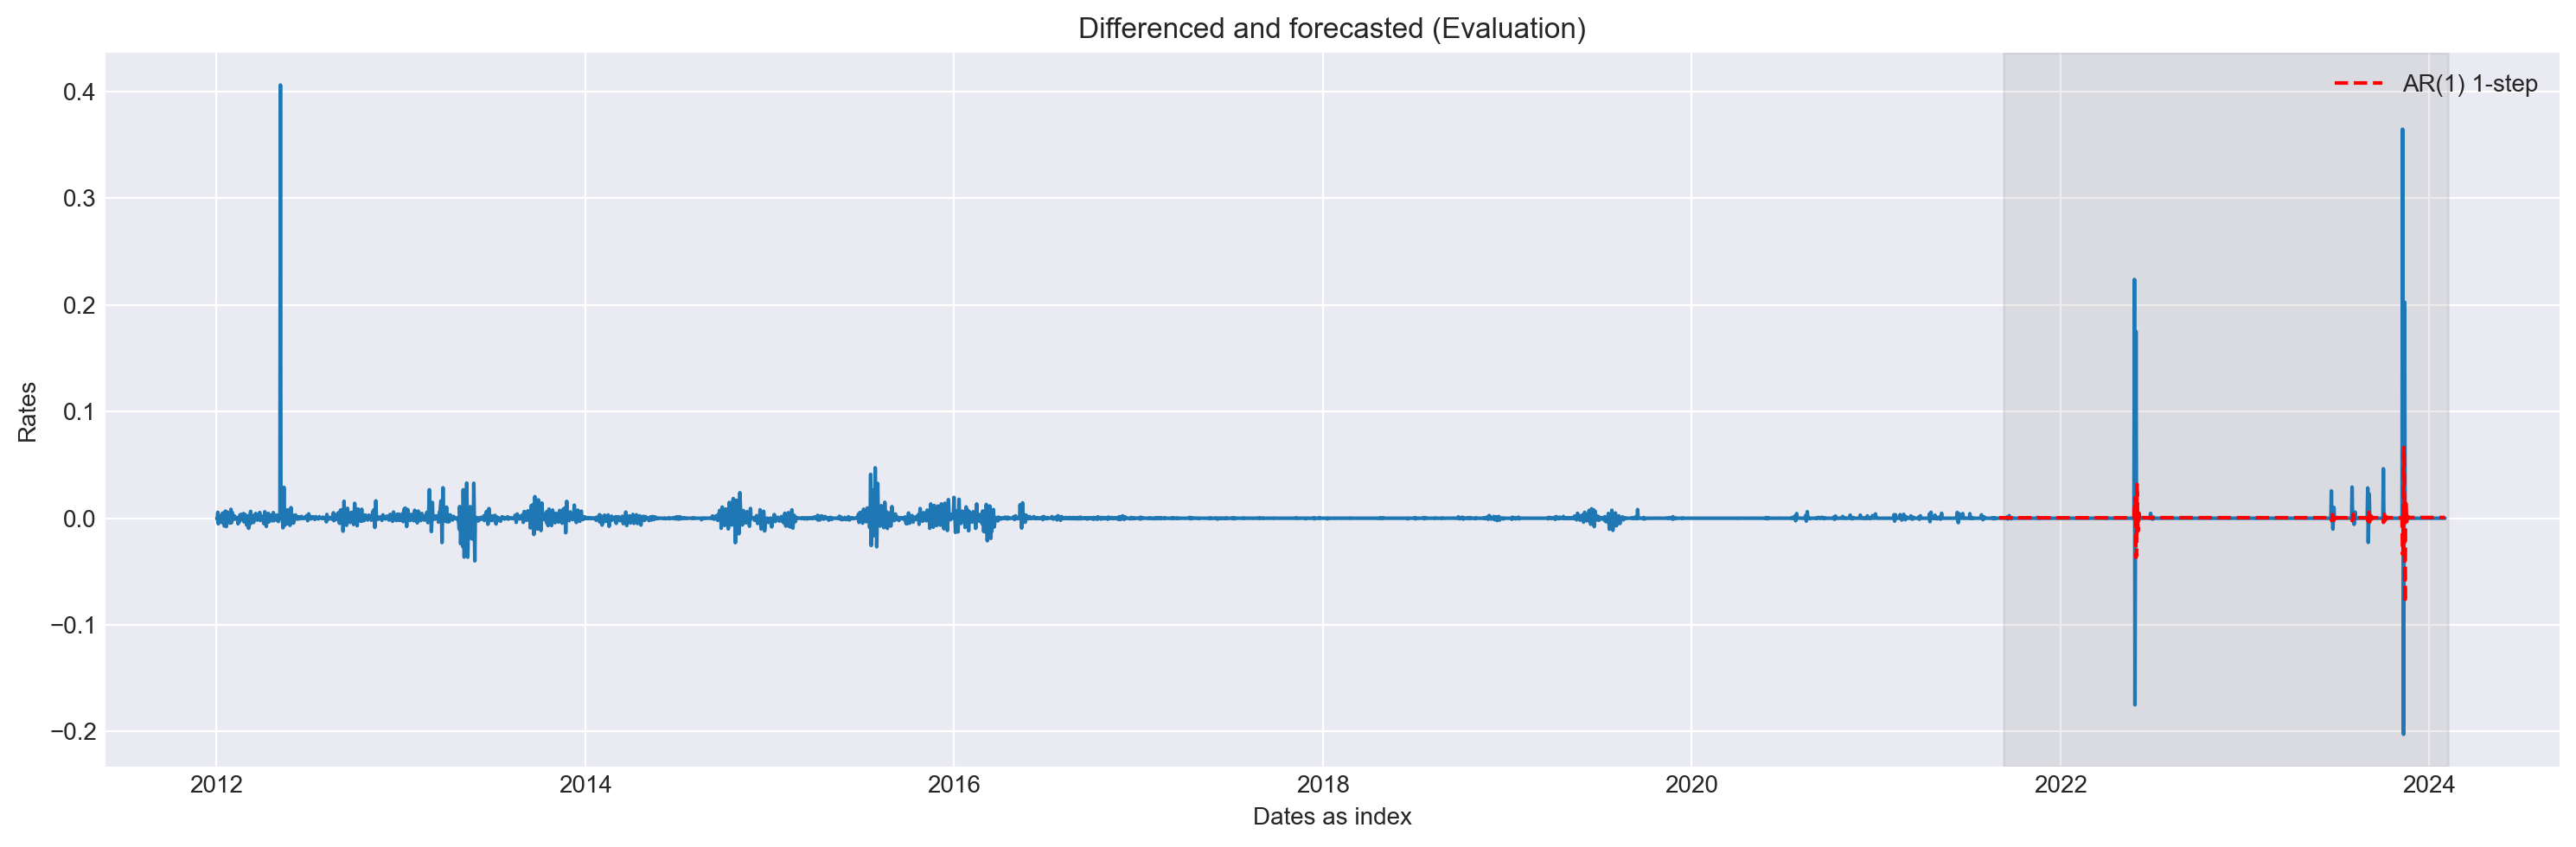

In [123]:
fig, ax4 = plt.subplots()
ax4.plot(exchange_forecast['Diff'])
ax4.plot(exchange_forecast[1], 'k--', label='AR(1) 1-step',color = 'red')
ax4.set_xlabel('Dates as index')
ax4.set_ylabel('Rates')
ax4.set_title('Differenced and forecasted (Evaluation)')
ax4.axvspan(18880, 19760, color='#808080', alpha=0.15)
ax4.legend(loc=1)
plt.show()

In [124]:
# forecasts from test data
pivoted_forecasts

horizon,1
2021-09-01,0.000426
2021-09-02,0.000429
2021-09-03,0.000431
2021-09-04,0.000429
2021-09-05,0.000428
...,...
2024-01-28,0.000652
2024-01-29,0.000652
2024-01-30,0.000652
2024-01-31,0.000652


In [125]:
# out-of-sample forecasting

res.forecast(12)

2024-02-02    0.000652
2024-02-03    0.000611
2024-02-04    0.000444
2024-02-05    0.000495
2024-02-06    0.000566
2024-02-07    0.000530
2024-02-08    0.000502
2024-02-09    0.000524
2024-02-10    0.000534
2024-02-11    0.000521
2024-02-12    0.000519
2024-02-13    0.000525
Freq: D, Name: predicted_mean, dtype: float64

In [126]:
# method to transform forecast values to original scale
def to_original_scale(initial_value,column):
    
    original_data = np.r_[initial_value,column].cumsum()
    return np.exp(original_data)

In [127]:
np.log(exchange_df.Buying)

Date
2012-01-02    5.090068
2012-01-03    5.088945
2012-01-04    5.094542
2012-01-05    5.089286
2012-01-06    5.087484
                ...   
2024-01-28    7.418620
2024-01-29    7.418620
2024-01-30    7.418620
2024-01-31    7.418620
2024-02-01    7.418620
Name: Buying, Length: 4414, dtype: float64

In [128]:
# differenced data to original scale
to_original_scale(5.090068,exchange_forecast.Diff)

array([ 162.40090494,  162.40090494,  162.21872991, ..., 1666.73290727,
       1666.73290727, 1666.73290727])

In [129]:
exchange_forecast

,Buying,Diff,1
2012-01-02,162.400875,0.000000,NaN
2012-01-03,162.218700,-0.001122,NaN
2012-01-04,163.129100,0.005596,NaN
2012-01-05,162.273900,-0.005256,NaN
2012-01-06,161.981800,-0.001802,NaN
...,...,...,...
2024-01-28,1666.732600,0.000000,0.000652
2024-01-29,1666.732600,0.000000,0.000652
2024-01-30,1666.732600,0.000000,0.000652
2024-01-31,1666.732600,0.000000,0.000652


In [130]:
# test data forecasts to original scale

forecasts_to_original = pd.Series(to_original_scale(6.69028,pivoted_forecasts[1]))
forecasts_to_original

0       804.547494
1       804.890385
2       805.235609
3       805.582480
4       805.928489
          ...     
880    1180.581341
881    1181.351659
882    1182.122303
883    1182.893273
884    1183.664570
Length: 885, dtype: float64

In [131]:
# out-of-sample forecasts to original scale

forecasts_to_original2 = pd.Series(to_original_scale(7.418620,res.forecast(2160)))
forecasts_to_original2 = forecasts_to_original2[1::]
forecasts_to_original2.index = res.forecast(2160).index
forecasts_to_original2

2024-02-02    1667.818610
2024-02-03    1668.838786
2024-02-04    1669.580684
2024-02-05    1670.406867
2024-02-06    1671.352780
                 ...     
2029-12-27    5152.277347
2029-12-28    5154.974709
2029-12-29    5157.673482
2029-12-30    5160.373668
2029-12-31    5163.075268
Freq: D, Length: 2160, dtype: float64

In [132]:
# concatenation of exchange_df and out-of-sample forecasts
NN = pd.concat([exchange_df[['Buying']],pd.DataFrame(forecasts_to_original2,columns = ['Buying'])])

In [133]:
NN

,Buying
2012-01-02,162.400875
2012-01-03,162.218700
2012-01-04,163.129100
2012-01-05,162.273900
2012-01-06,161.981800
...,...
2029-12-27,5152.277347
2029-12-28,5154.974709
2029-12-29,5157.673482
2029-12-30,5160.373668


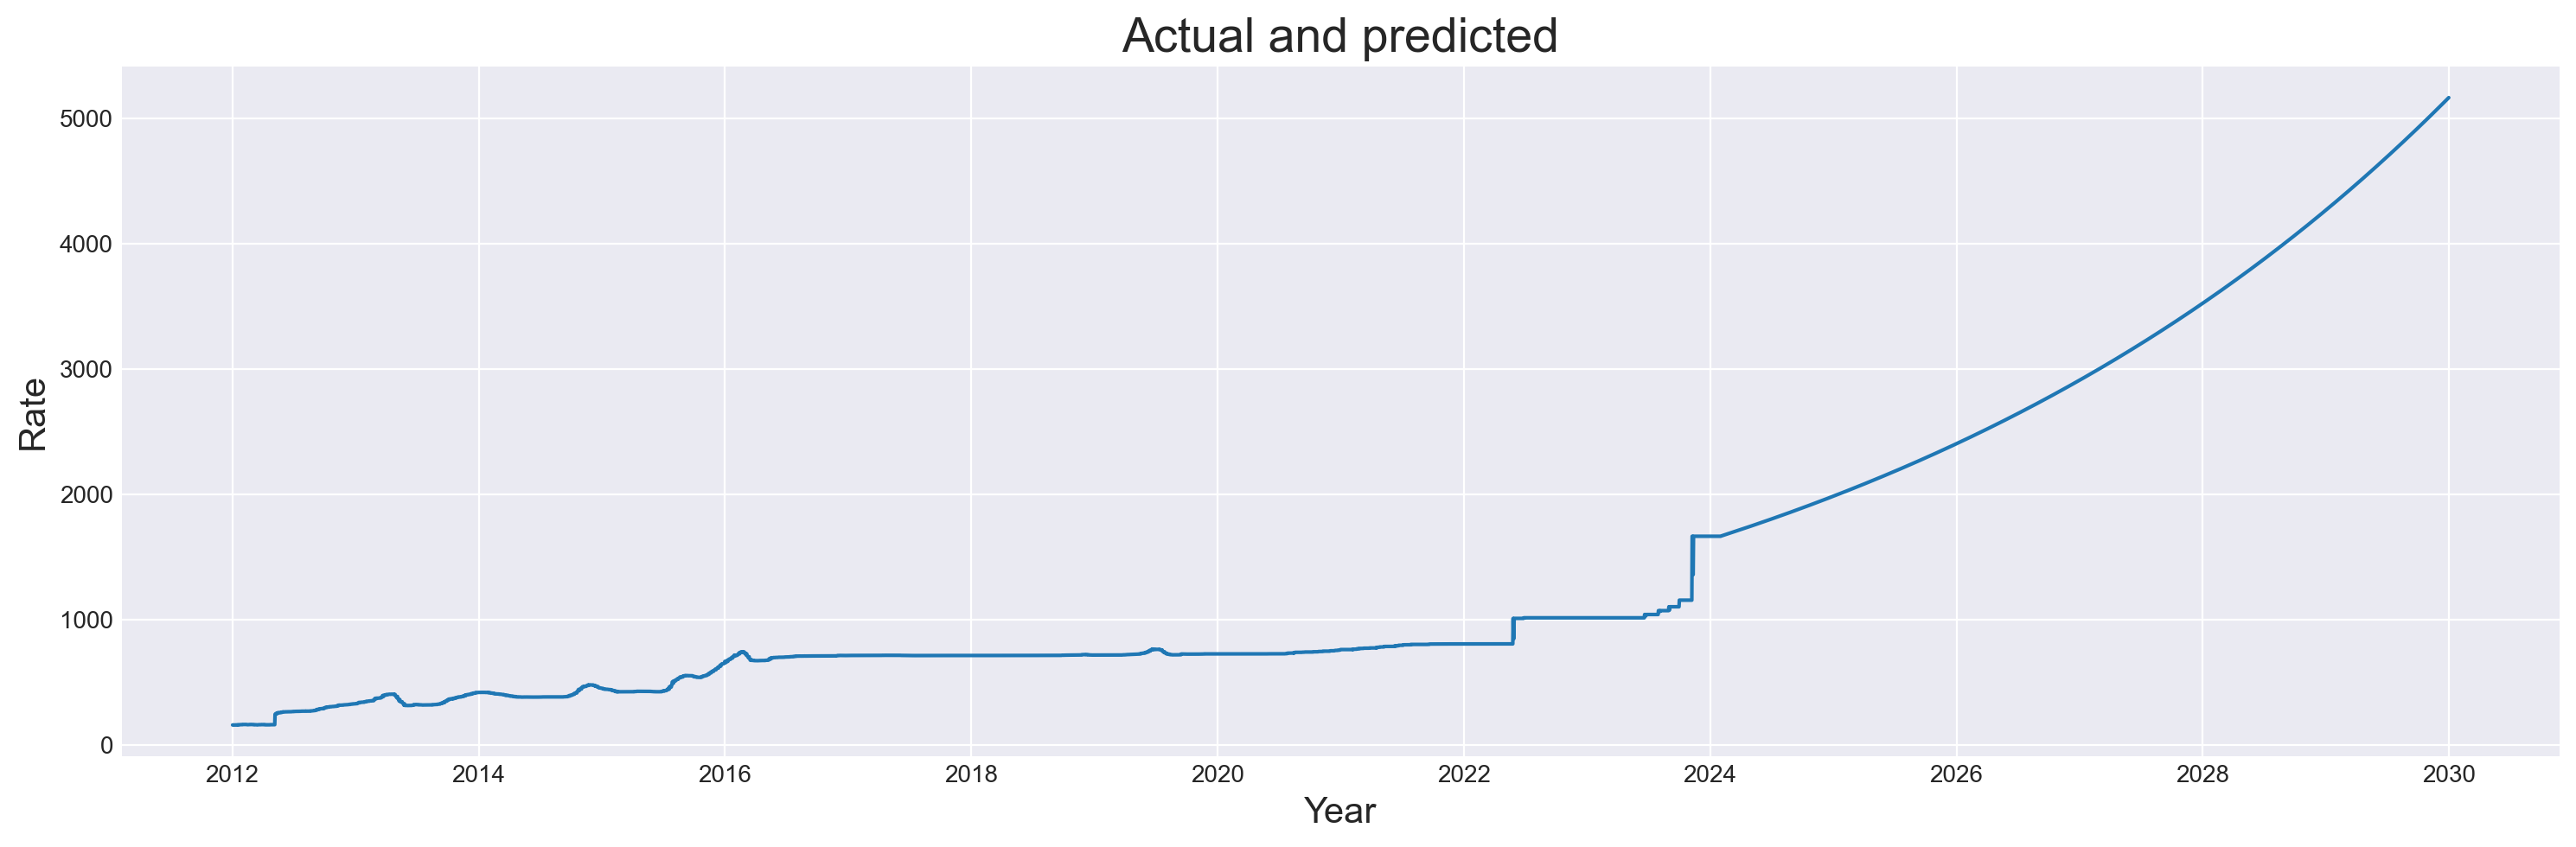

In [139]:
plt.plot(NN)
plt.title('Actual and predicted',size = 20)
plt.xlabel('Year',size = 15)
plt.ylabel('Rate',size = 15)
plt.show()

In [135]:
forecasts_to_original2.to_csv('exchange_forecast.csv')

<h3 style = 'background-color:peachpuff;padding:10px;border-radius:10px;color:teal;text-align:center;margin-left:0px;width:300px'> Model Evaluation </h3>

In [136]:
# transforming data for evaluation

forecast_errors = forecasts.apply(lambda column: exchange_forecast.Diff - column).reindex(forecasts.index)
flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')

print(flattened.iloc[:4, :5])

         2021-09-01  2021-09-02  2021-09-03  2021-09-04  2021-09-05
horizon                                                            
1         -0.000426   -0.000429   -0.000431   -0.000429   -0.000428


In [137]:
# root mean square error (RMSE)
rmse = (flattened**2).mean(axis=1)**0.5

print(rmse)

horizon
1    0.018856
dtype: float64


In [138]:
# Compute the mean absolute error (MAE)
mae = (abs(flattened).mean(axis=1))

print(mae)

horizon
1    0.002596
dtype: float64
